# Paris - City of Light
## Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## I. Introduction: Business Problem <a name="introduction"></a>

In this project we will try to help the **Mayor of Paris** and his colleagues nearby Paris to adjust the **City policies** in order to encourage **social diversity** and to increase the **attractiveness of the neighborhoods**.

Paris is a tremendous city of 2 million inhabitants, with a very rich offer of culture, history but also gastronomy and nature. Around, the "Ile de France" region is the biggest european region in terms of population and GDP. Real estate is quite expensive, and there are important discrepancies among the 20 Paris districts ("Arrondissements") and the cities which are very close to Paris.

Our project will focus on East Paris (10 arrondissements) and 10 surrounding cities close to East Paris. Data collection and interpretation will focus on two distinct parts:
- first, we will examine the **real estate** price per "Arrondissement" or city, based on the available public data of Real Estate transactions. We will calculate the average price per square meter per city.
- second, we will find the most **popular venues** and segment the neighborhoods according to the typology of their venues. Of course, Foursquera will be used to collect the associated data.

Once we have the Real Estate prices associated to each Quartier and the Venues profile, we will try to find a **correlation** between the two types of data and describe what is the **venue segment associated with a "expensive", "medium" and "low price" neighborhood**.

We will than use then our data science powers to make some recommendation for the Mayor in order to adjust the City Policies. Particularly, we will try to find **what kind of venues** should be encouraged in order to increase the **attractiveness of the low price neighborhoods**.

## II. Data <a name="data"></a>

Let's start by importing the necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### II.1 The geographical region we will study

The geographical region we will focus on is East Paris and the cities close to paris on it's East side.

Let's start by having a look on this part of map.

In [20]:
latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of East Paris
paris_east_map

Let's mark on the map the boundaries of the **Cities** and **"Arrondissements"** we are interested in. 

We will use for this the GeoJson file available on https://france-geojson.gregoiredavid.fr

In [21]:
#windows version of wget
import wget

url = 'https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson'
filename = wget.download(url)

filename

communes_ile_de_france = r'communes-ile-de-france.geojson'
print(communes_ile_de_france)
folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

paris_east_map

ModuleNotFoundError: No module named 'wget'

In [22]:
!wget --quiet https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson -O communes-ile-de-france.geojson
    
print('GeoJSON file downloaded!')

communes_ile_de_france = r'communes-ile-de-france.geojson'
print(communes_ile_de_france)
folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

paris_east_map

GeoJSON file downloaded!
communes-ile-de-france.geojson


The **city_list** is the collection of ZIP codes corresponding to the cities or Paris Arrondissements we are interested in

In [2]:
city_list = [75003, 75004, 75005, 75010, 75011, 75012, 75013, 75018, 75019, 75020, 93100, 93110, 93170, 93230, 93260, 93310, 93500, 94120, 94130, 94160, 94220, 94300, 94340, 94410]

### II.2 Data related to real estate transactions

Now let's collect the data associated with the real estate transactions in thsi region.

This data is public, and a full description (in French) can be found on the site below:
https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/

The brute data can be downloaded using the site https://www.data.gouv.fr/fr/datasets/les-communes-d-ile-de-france-idf/

I have uploaded into the IBM cloud the files corresponding to the real estate sales in 2018 in 3 departments from Ile de France:
    - 75 - Paris
    - 93 - Seine Saint Denis
    - 94 - Val de Marne

They correspond to teh Paris East Region we want to study.

The hidden code below import brute data into 3 pandas Dataframes

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5fa043401dd344ca9d75c1ec1d1d6b13 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fx7y0OF-K29wdDIUzSU6dWi1ypY9vEBzw251_M_qvcaE',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='75_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='93_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

body = client_5fa043401dd344ca9d75c1ec1d1d6b13.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-tbucqk0gnlwasx',Key='94_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,17,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
import os
os.getcwd()

'/home/dsxuser/work'

In [88]:
#windows version

df_data_1 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\75_2018.csv')
df_data_2 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\93_2018.csv')
df_data_3 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\94_2018.csv')

D:\Python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,17,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's concatenate these data into a sigle dataframe which we will call **restate_primary_data**. 

We get approx. 156,000 lines corresponding to unitary transactions on flats, houses, parkings, shops etc. sold in 2018 in these 3 departments.

In [4]:
df_list = [df_data_1, df_data_2, df_data_3]
restate_primary_data = pd.concat(df_list)

print (restate_primary_data.shape)
restate_primary_data.head()

(156424, 40)


id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276175    2018-01-04                   1           Vente   
1  2018-1276176    2018-01-09                   1           Vente   
2  2018-1276177    2018-01-05                   1           Vente   
3  2018-1276177    2018-01-05                   1           Vente   
4  2018-1276178    2018-01-03                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  adresse_nom_voie  \
0        1202000.0            10.0             NaN        AV PERCIER   
1         130000.0            20.0             NaN  RUE SAINT CLAUDE   
2          51000.0            24.0             NaN     RUE TREILHARD   
3          51000.0            24.0             NaN     RUE TREILHARD   
4          15000.0            12.0             NaN         RUE VOLTA   

  adresse_code_voie  code_postal  code_commune              nom_commune  \
0              7250      75008.0         75108  Paris 8e Arrondissement   
1              8520      75003.0         75103  Paris 3e Arrondissement   
2              9429      75008.0         75108  Paris 8e Arrondissement   
3              9429      75008.0         75108  Paris 8e Arrondissement   
4              9905      75003.0         75103  Paris 3e Arrondissement   

   code_departement  ancien_code_commune ancien_nom_commune     id_parcelle  \
0                75                  NaN                NaN  75108000CJ0003   
1                75                  NaN                NaN  75103000AL0072   
2                75                  NaN                NaN  75108000CI0004   
3                75                  NaN                NaN  75108000CI0004   
4                75                  NaN                NaN  75103000AE0136   

   ancien_id_parcelle numero_volume lot1_numero  lot1_surface_carrez  \
0                 NaN           NaN          77                159.2   
1                 NaN           NaN         206                  NaN   
2                 NaN           NaN          20                  NaN   
3                 NaN           NaN          27                  NaN   
4                 NaN           NaN           7                  8.3   

  lot2_numero  lot2_surface_carrez  lot3_numero  lot3_surface_carrez  \
0          78                  NaN         79.0                  NaN   
1         213                  NaN        214.0                  NaN   
2         NaN                  NaN          NaN                  NaN   
3         NaN                  NaN          NaN                  NaN   
4         NaN                  NaN          NaN                  NaN   

   lot4_numero  lot4_surface_carrez  lot5_numero  lot5_surface_carrez  \
0          NaN                  NaN          NaN                  NaN   
1        216.0                  NaN          NaN                  NaN   
2          NaN                  NaN          NaN                  NaN   
3          NaN                  NaN          NaN                  NaN   
4          NaN                  NaN          NaN                  NaN   

   nombre_lots  code_type_local   type_local  surface_reelle_bati  \
0            3              2.0  Appartement                120.0   
1            4              2.0  Appartement                 22.0   
2            1              3.0   Dépendance                  NaN   
3            1              3.0   Dépendance                  NaN   
4            1              2.0  Appartement                  9.0   

   nombre_pieces_principales code_nature_culture nature_culture  \
0                        2.0                 NaN            NaN   
1                        1.0                 NaN            NaN   
2                        0.0                 NaN            NaN   
3                        0.0                 NaN            NaN   
4                        1.0                 NaN            NaN   

  code_nature_culture_speciale nature_culture_speciale  surface_terrain  \
0                          NaN  

We will keep only 13 usefull columns ans perform some data cleaning.

In [5]:
restate_primary_data = restate_primary_data[['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation', 'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie', 'code_postal', 'nom_commune', 'type_local', 'surface_reelle_bati', 'longitude', 'latitude']]
restate_primary_data[['numero_disposition']] = 1
restate_primary_data.replace({'adresse_numero': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'adresse_numero': 'int64'}, copy=False)
restate_primary_data.replace({'code_postal': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'code_postal': 'int64'}, copy=False)
restate_primary_data.replace({'surface_reelle_bati': np.NaN}, value=0, inplace=True)
print (restate_primary_data.shape)
restate_primary_data.head()

(156424, 13)


id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276175    2018-01-04                   1           Vente   
1  2018-1276176    2018-01-09                   1           Vente   
2  2018-1276177    2018-01-05                   1           Vente   
3  2018-1276177    2018-01-05                   1           Vente   
4  2018-1276178    2018-01-03                   1           Vente   

   valeur_fonciere  adresse_numero  adresse_nom_voie  code_postal  \
0        1202000.0              10        AV PERCIER        75008   
1         130000.0              20  RUE SAINT CLAUDE        75003   
2          51000.0              24     RUE TREILHARD        75008   
3          51000.0              24     RUE TREILHARD        75008   
4          15000.0              12         RUE VOLTA        75003   

               nom_commune   type_local  surface_reelle_bati  longitude  \
0  Paris 8e Arrondissement  Appartement                120.0   2.315005   
1  Paris 3e Arrondissement  Appartement                 22.0   2.365335   
2  Paris 8e Arrondissement   Dépendance                  0.0   2.313122   
3  Paris 8e Arrondissement   Dépendance                  0.0   2.313122   
4  Paris 3e Arrondissement  Appartement                  9.0   2.357140   

    latitude  
0  48.874705  
1  48.860248  
2  48.877067  
3  48.877067  
4  48.864804

Here below is the list of zip codes for the Arrondissements and Cities we would like to study.

We will include the data for these cities into a new dataframe called **df_east_paris_primary**. We get a reduced list of approx. **56,000** elementary transactions.

In [6]:
city_list = [75003, 75004, 75005, 75010, 75011, 75012, 75013, 75018, 75019, 75020, 93100, 93110, 93170, 93230, 93260, 93310, 93500, 94120, 94130, 94160, 94220, 94300, 94340, 94410]

for code_city in city_list:
    if code_city == 75003:
        df_east_paris_primary = restate_primary_data.loc[restate_primary_data['code_postal'] == code_city]
    else:
        df_east_paris_primary = df_east_paris_primary.append(restate_primary_data.loc[restate_primary_data['code_postal'] == code_city])

df_east_paris_primary.shape

(55786, 13)

Let's take a look on how many elementary transactions we have per Arrondissement or City for our **city_list**

In [7]:
df_east_paris_primary.reset_index(drop=True, inplace=True)
df_east_paris_primary.groupby(['code_postal'])['nom_commune'].value_counts()

code_postal  nom_commune             
75003        Paris 3e Arrondissement     1347
75004        Paris 4e Arrondissement     1378
75005        Paris 5e Arrondissement     1383
75010        Paris 10e Arrondissement    3254
75011        Paris 11e Arrondissement    4832
75012        Paris 12e Arrondissement    3703
75013        Paris 13e Arrondissement    2883
75018        Paris 18e Arrondissement    6245
75019        Paris 19e Arrondissement    5134
75020        Paris 20e Arrondissement    3658
93100        Montreuil                   2693
93110        Rosny-sous-Bois             1813
93170        Bagnolet                     984
93230        Romainville                 5685
93260        Les Lilas                   1011
93310        Le Pré-Saint-Gervais         495
93500        Pantin                      1650
94120        Fontenay-sous-Bois          1630
94130        Nogent-sur-Marne            1342
94160        Saint-Mandé                  869
94220        Charenton-le-Pont            

What type of transactions do we have here?

In [10]:
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()

numero_disposition  nature_mutation                   
1                   Vente                                 50583
                    Vente en l'état futur d'achèvement     4542
                    Echange                                 382
                    Adjudication                            181
                    Vente terrain à bâtir                    81
                    Expropriation                            17
Name: nature_mutation, dtype: int64

And how many objects have been transacted (appartment, houses, shops etc...)?

In [11]:
df_east_paris_primary.groupby(['numero_disposition'])['type_local'].value_counts()

numero_disposition  type_local                              
1                   Appartement                                 33133
                    Dépendance                                  12819
                    Local industriel. commercial ou assimilé     3842
                    Maison                                       1240
Name: type_local, dtype: int64

We will now keep only simple classical transactions (sale) and we will add category columns for the type of object sold (appartment, house etc.)

In [8]:
index_coll = df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Adjudication'].index
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Echange'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Expropriation'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Vente terrain à bâtir'].index)
index_coll = index_coll.sort_values()
df_east_paris_primary.drop(index_coll, inplace=True)
df_east_paris_primary = pd.concat([df_east_paris_primary,pd.get_dummies(df_east_paris_primary['type_local'])], axis=1)
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()
df_east_paris_primary.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276176    2018-01-09                   1           Vente   
1  2018-1276178    2018-01-03                   1           Vente   
2  2018-1276181    2018-01-09                   1           Vente   
3  2018-1276181    2018-01-09                   1           Vente   
4  2018-1276181    2018-01-09                   1           Vente   

   valeur_fonciere  adresse_numero  adresse_nom_voie  code_postal  \
0         130000.0              20  RUE SAINT CLAUDE        75003   
1          15000.0              12         RUE VOLTA        75003   
2        1840000.0             251  RUE SAINT MARTIN        75003   
3        1840000.0             251  RUE SAINT MARTIN        75003   
4        1840000.0             251  RUE SAINT MARTIN        75003   

               nom_commune   type_local  surface_reelle_bati  longitude  \
0  Paris 3e Arrondissement  Appartement                 22.0   2.365335   
1  Paris 3e Arrondissement  Appartement                  9.0   2.357140   
2  Paris 3e Arrondissement   Dépendance                  0.0   2.353682   
3  Paris 3e Arrondissement   Dépendance                  0.0   2.353682   
4  Paris 3e Arrondissement  Appartement                180.0   2.353682   

    latitude  Appartement  Dépendance  \
0  48.860248            1           0   
1  48.864804            1           0   
2  48.866408            0           1   
3  48.866408            0           1   
4  48.866408            1           0   

   Local industriel. commercial ou assimilé  Maison  
0                                         0       0  
1                                         0       0  
2                                         0       0  
3                                         0       0  
4                                         0       0

Now let's group the elements per transaction. We will keep a **single line per transaction** (while in the original files there was a line per object sold).

At the end, we havve approx. **32,000** of global transactions concerning this geographical zone.

In [9]:
df1 = df_east_paris_primary.groupby(['id_mutation', 'date_mutation', 'nature_mutation', 'code_postal', 'nom_commune'])\
    [['adresse_numero', 'adresse_nom_voie','valeur_fonciere', 'longitude', 'latitude']].max().reset_index()

df2 = df_east_paris_primary.groupby(['id_mutation'])\
    [['numero_disposition', 'surface_reelle_bati', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé', 'Maison']].sum().reset_index()

df3 = df1.join(df2.set_index('id_mutation'), on='id_mutation')
df3 = df3.astype({'Appartement': 'int64'}, copy=False)
df3 = df3.astype({'Dépendance': 'int64'}, copy=False)
df3 = df3.astype({'Local industriel. commercial ou assimilé': 'int64'}, copy=False)
df3 = df3.astype({'Maison': 'int64'}, copy=False)
print (df3.shape)
df3.head()

(32447, 16)


id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195958    2018-01-05           Vente        93260    Les Lilas   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4              45   BD DE LA LIBERTE         626400.0   2.420566  48.880405   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   1                110.0            0           0   

   Local industriel. commercial ou assimilé  Maison  
0                                         0       0  
1                                         0       0  
2                                         0       0  
3                                         0       0  
4                                         0       1

We will now keep only the transactions concerning the **Appartments** and drop everything else. 

Final data will be stored in **east_paris_transactions** dataframe

In [10]:
index_coll = df3[df3['Local industriel. commercial ou assimilé'] >= 1].index
index_coll = index_coll.append(df3[df3['Maison'] >= 1].index)
index_coll = index_coll.append(df3[df3['Appartement'] < 1].index)
east_paris_transactions = df3.drop(index_coll)
east_paris_transactions.reset_index(drop=True, inplace=True)
print(east_paris_transactions.shape)

(23904, 16)


We will now calculate and enrich the dataframe with the **price per square meter**.

In [11]:
#insert a new column - prix au m2
east_paris_transactions['nombre_transactions'] = 1
east_paris_transactions['prix_m2'] = east_paris_transactions['valeur_fonciere'] / east_paris_transactions['surface_reelle_bati']

east_paris_transactions.head()

id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195960    2018-01-05           Vente        93500       Pantin   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4             143     AV JEAN LOLIVE         695000.0   2.412250  48.893774   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   3                107.0            1           2   

   Local industriel. commercial ou assimilé  Maison  nombre_transactions  \
0                                         0       0                    1   
1                                         0       0                    1   
2                                         0       0                    1   
3                                         0       0                    1   
4                                         0       0                    1   

       prix_m2  
0  3898.305085  
1  2250.000000  
2  4036.363636  
3  5346.153846  
4  6495.327103

Let's take a look at the distribution of price per square meter in our data, city by city. We will use a boxplot graph.

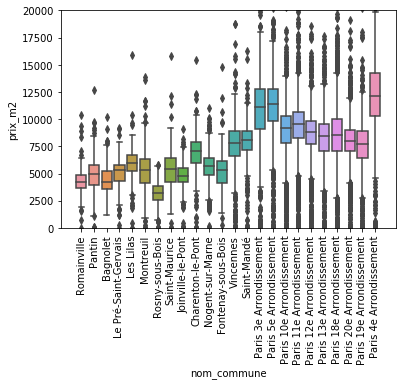

In [12]:
sns.boxplot(x="nom_commune", y="prix_m2", data=east_paris_transactions)
plt.ylim(0, 20000)
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')

So, depending on the cityes, median price go between **3000€/m²** and more than **12000€/m²**.

Let's take a look at the outliers, and simply drop them (pirces per squere meter above 20000€ or below 500€). The number of transactions we will keep per city is herebelow.

In [13]:
index_coll = east_paris_transactions[east_paris_transactions['prix_m2'] > 20000].index
index_coll = index_coll.append(east_paris_transactions[east_paris_transactions['prix_m2'] < 500].index)
east_paris_transactions = east_paris_transactions.drop(index_coll)
east_paris_transactions.reset_index(drop=True, inplace=True)
print(east_paris_transactions.shape)

east_paris_transactions.groupby(['code_postal', 'nom_commune'])['nombre_transactions'].sum()

(23367, 18)


code_postal  nom_commune             
75003        Paris 3e Arrondissement      760
75004        Paris 4e Arrondissement      524
75005        Paris 5e Arrondissement      824
75010        Paris 10e Arrondissement    1627
75011        Paris 11e Arrondissement    2561
75012        Paris 12e Arrondissement    1675
75013        Paris 13e Arrondissement    1576
75018        Paris 18e Arrondissement    3626
75019        Paris 19e Arrondissement    1829
75020        Paris 20e Arrondissement    2123
93100        Montreuil                   1035
93110        Rosny-sous-Bois              472
93170        Bagnolet                     312
93230        Romainville                  205
93260        Les Lilas                    275
93310        Le Pré-Saint-Gervais         198
93500        Pantin                       643
94120        Fontenay-sous-Bois           430
94130        Nogent-sur-Marne             572
94160        Saint-Mandé                  407
94220        Charenton-le-Pont            

#### To resume, we have now, in the dataframe east_paris_transactions the list of real estate transactions from 2018 in the cities of our choice, with the associated price / squere meter

#### This list contains approx. 23,000 transactions

### II.3 Divide geographical space in square tiles

Now let's analyse the geographical shape of our list of cities and divide this surface in a grid of 15x15 tiles.

In [15]:
bins_lat = np.linspace(min(east_paris_transactions['latitude']), max(east_paris_transactions['latitude']), 16)
lat_names = list(range(0,15))
east_paris_transactions['bins_lat'] = pd.cut(east_paris_transactions['latitude'], bins_lat, labels=lat_names, include_lowest=True)
bins_long = np.linspace(min(east_paris_transactions['longitude']), max(east_paris_transactions['longitude']), 16)
long_names = lat_names = list(range(0,15))
east_paris_transactions['bins_long'] = pd.cut(east_paris_transactions['longitude'], bins_long, labels=long_names, include_lowest=True)

east_paris_transactions.head()

id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195960    2018-01-05           Vente        93500       Pantin   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4             143     AV JEAN LOLIVE         695000.0   2.412250  48.893774   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   3                107.0            1           2   

   Local industriel. commercial ou assimilé  Maison  nombre_transactions  \
0                                         0       0                    1   
1                                         0       0                    1   
2                                         0       0                    1   
3                                         0       0                    1   
4                                         0       0                    1   

       prix_m2 bins_lat bins_long  
0  3898.305085       10         9  
1  2250.000000       12         5  
2  4036.363636        8         7  
3  5346.153846       12         6  
4  6495.327103       11         7

We will calculate now the average **price / square meter** and the **number of transactions** which occured in each tile.

In [16]:
tiles = east_paris_transactions.groupby(['bins_lat','bins_long'])['prix_m2'].mean().reset_index()
tiles.set_index(['bins_lat', 'bins_long'])

tiles2 = east_paris_transactions.groupby(['bins_lat','bins_long'])['nombre_transactions'].sum().reset_index()
tiles2.set_index(['bins_lat', 'bins_long'])

tiles= tiles.join(tiles2.set_index(['bins_lat', 'bins_long']), on=['bins_lat','bins_long'])
tiles = tiles.dropna().set_index(['bins_lat', 'bins_long']).reset_index()
tiles = tiles.astype({'nombre_transactions': 'int64'}, copy=False)
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions
0        0         7  5664.557788                   35
1        0         8  6827.312677                   20
2        0         9  5282.868018                    4
3        0        10  5288.182929                   37
4        0        11  4720.313914                  164

Let's enrich this tile list with the geographical information (latitude, longitude, square borders)

In [17]:
for lat in range(0, 15):
    index_list = tiles[tiles['bins_lat']==lat].index
    for k in index_list:
        tiles.at[k, 'lat_s'] = bins_lat[lat]
        tiles.at[k, 'lat_n'] = bins_lat[lat+1]
        tiles.at[k, 'latitude'] = (bins_lat[lat] + bins_lat[lat+1])/2

for long in range(0, 15):
    index_list = tiles[tiles['bins_long']==long].index
    for k in index_list:
        tiles.at[k, 'long_w'] = bins_long[long]
        tiles.at[k, 'long_e'] = bins_long[long+1]
        tiles.at[k, 'longitude'] = (bins_long[long] + bins_long[long+1])/2

for i in tiles.index:
    s = "{0}_{1}".format (tiles.loc[i, 'bins_lat'], tiles.loc[i, 'bins_long'],)
    tiles.loc[i, 'tile_id'] = s

tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0         9  5282.868018                    4  48.811961  48.818836   
3        0        10  5288.182929                   37  48.811961  48.818836   
4        0        11  4720.313914                  164  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  
0  48.815398  2.410483  2.422537   2.416510     0_7  
1  48.815398  2.422537  2.434592   2.428565     0_8  
2  48.815398  2.434592  2.446647   2.440619     0_9  
3  48.815398  2.446647  2.458701   2.452674    0_10  
4  48.815398  2.458701  2.470756   2.464729    0_11

Let's have a look of how these tiles map the list of cities and arrondissements we are interested in.

Prior, we will define a function **rectTile** which allows to create a json geometrical square object. Then, build a GeoJson file which contains the list of all our tiles.

In [18]:
def rectTile(tile_ids, long_w_list, long_e_list, lat_s_list, lat_n_list):
    
    tile_list=[]
    for tile_id, long_w, long_e, lat_s, lat_n,  in zip(tile_ids, long_w_list, long_e_list, lat_s_list, lat_n_list):
                 
        # print("tile_id ", tile_id)
        # return only relevant information for each nearby venue
        tile_list.append(
             {"type":"Feature",\
                "geometry":\
                  {"type":"Polygon",\
                     "coordinates":[[[long_w, lat_s],[long_w, lat_n],[long_e, lat_n],[long_e, lat_s]]]},\
                "properties":{"tile_id":tile_id}})
    return(tile_list)

east_tile_list = rectTile(tile_ids=tiles['tile_id'],
                                    long_w_list=tiles['long_w'],
                                    long_e_list=tiles['long_e'],
                                    lat_s_list=tiles['lat_s'],
                                    lat_n_list=tiles['lat_n']                                                                
                                  )

east_tiles = {"type":"FeatureCollection",\
"features": east_tile_list}

f = open('all_tiles.json', 'w')
json.dump(east_tiles, f)
f.close()

Now let's show the map, with the border of cities and the initial list of tiles we have built

In [23]:
latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

workfile = r'all_tiles.json'
print(workfile)

folium.GeoJson(
    workfile
).add_to(paris_east_map)

paris_east_map

all_tiles.json


On the top of that, center the circles in which we will look for Foursquera venues. The optimal radius seems to be 380 meters.

In [23]:
for lat, lon in zip(tiles['latitude'], tiles['longitude']):
    #print (lat, lon)
    folium.Circle([lat, lon], radius=380, color='blue', fill=False).add_to(paris_east_map)
paris_east_map

Looks good, but it is a little bit clumsy :-(

### II.4 Foursquera

In [24]:
# @hidden_cell
CLIENT_ID = 'WRGTBGWVIWD1S0LLK0GRGEARWM2GBYEQ1QOP0PSIPNBJHOUT' # your Foursquare ID
CLIENT_SECRET = 'VALOPUUYGGEAIWKNIW5WVQRIIGYRO2EZJ0LOTKT1JDXXECKF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Now, let's get the venues for the list of tiles we have built

In [25]:
def getNearbyVenues(tile_ids, latitudes, longitudes, radius=550, LIMIT=100):
    
    venues_list=[]
    for tile_id, lat, lng in zip(tile_ids, latitudes, longitudes):
                 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        print("tile_id ", tile_id, ": ", len(results), " venues")
        # return only relevant information for each nearby venue
        venues_list.append([(
            tile_id,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['tile_id',
                  'Tile Latitude', 
                  'Tile Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

paris_east_venues = getNearbyVenues(tile_ids=tiles['tile_id'],
                                    latitudes=tiles['latitude'],
                                    longitudes=tiles['longitude']
                                  )

paris_east_venues.tail(20)

tile_id  0_7 :  8  venues
tile_id  0_8 :  5  venues
tile_id  0_9 :  4  venues
tile_id  0_10 :  6  venues
tile_id  0_11 :  8  venues
tile_id  0_12 :  7  venues
tile_id  1_1 :  27  venues
tile_id  1_2 :  67  venues
tile_id  1_3 :  63  venues
tile_id  1_4 :  7  venues
tile_id  1_5 :  28  venues
tile_id  1_6 :  17  venues
tile_id  1_7 :  9  venues
tile_id  1_8 :  4  venues
tile_id  1_11 :  13  venues
tile_id  1_12 :  7  venues
tile_id  2_1 :  53  venues
tile_id  2_2 :  93  venues
tile_id  2_3 :  37  venues
tile_id  2_4 :  45  venues
tile_id  2_6 :  4  venues
tile_id  2_11 :  5  venues
tile_id  2_12 :  5  venues
tile_id  2_13 :  9  venues
tile_id  3_1 :  52  venues
tile_id  3_2 :  100  venues
tile_id  3_3 :  33  venues
tile_id  3_4 :  59  venues
tile_id  3_5 :  63  venues
tile_id  3_6 :  36  venues
tile_id  3_7 :  8  venues
tile_id  3_11 :  5  venues
tile_id  3_12 :  6  venues
tile_id  3_13 :  18  venues
tile_id  3_14 :  4  venues
tile_id  4_0 :  65  venues
tile_id  4_1 :  69  venues
tile_i

tile_id  Tile Latitude  Tile Longitude                           Venue  \
5167    13_6      48.904773        2.404455                          MurMur   
5168    13_6      48.904773        2.404455                         Mondial   
5169    13_6      48.904773        2.404455                   Beleck Hotels   
5170    13_6      48.904773        2.404455       Compagnie d'arc de Pantin   
5171    13_7      48.904773        2.416510                     Tang Frères   
5172    13_7      48.904773        2.416510                        Carglass   
5173    13_7      48.904773        2.416510                       kedy pack   
5174    13_7      48.904773        2.416510                 Comfort Bobigny   
5175    14_5      48.911648        2.392401                       KIngooroo   
5176    14_5      48.911648        2.392401                         Sportil   
5177    14_6      48.911648        2.404455        Théatre Équestre Zingaro   
5178    14_6      48.911648        2.404455            In Situ Art Festival   
5179    14_6      48.911648        2.404455  Métro Fort d'Aubervilliers [7]   
5180    14_6      48.911648        2.404455             ASPTT Aubervilliers   
5181    14_7      48.911648        2.416510                Les Courtilleres   
5182    14_7      48.911648        2.416510     Cafétéria Le Pont De Pierre   
5183    14_7      48.911648        2.416510              Boulangerie Louise   
5184    14_7      48.911648        2.416510               Hotel B&B Bobigny   
5185    14_7      48.911648        2.416510             Stade Marcel Cerdan   
5186    14_7      48.911648        2.416510        Stade Interdepartemental   

      Venue Latitude  Venue Longitude                Venue Category  
5167       48.902748         2.401252                  Climbing Gym  
5168       48.902135         2.406884                  Home Service  
5169       48.902233         2.400651                    Hotel Pool  
5170       48.909057         2.401340          Gym / Fitness Center  
5171       48.903145         2.417425                   Supermarket  
5172       48.902950         2.416687             Other Repair Shop  
5173       48.904234         2.419432              Department Store  
5174       48.905784         2.422496                         Hotel  
5175       48.907874         2.395802  Theme Park Ride / Attraction  
5176       48.909728         2.398552            Athletics & Sports  
5177       48.913312         2.403522         Performing Arts Venue  
5178       48.911218         2.404677                    Street Art  
5179       48.914680         2.403635                 Metro Station  
5180       48.915901         2.406920                  Soccer Field  
5181       48.913096         2.417603                   Bus Station  
5182       48.913123         2.420003                         Diner  
5183       48.909757         2.412532                        Bakery  
5184       48.915527         2.417319                         Hotel  
5185       48.908944         2.421295                  Soccer Field  
5186       48.908654         2.421443            Athletics & Sports

How many venues do we have?

A quick histogram will help to understand how many venues we have per tile.

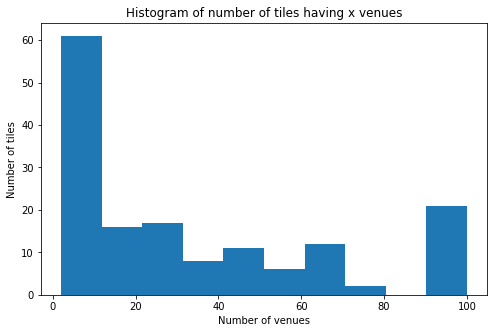

In [26]:
paris_east_venues['nombre_venues'] = 1
venues_per_tile = paris_east_venues.groupby(['tile_id','Tile Latitude', 'Tile Longitude'])['nombre_venues'].sum().reset_index()

# np.histogram returns 2 values
count, bin_edges = np.histogram(venues_per_tile['nombre_venues'])

#print(count) # frequency count
#print(bin_edges) # bin ranges, default = 10 bins

venues_per_tile['nombre_venues'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of number of tiles having x venues') # add a title to the histogram
plt.ylabel('Number of tiles') # add y-label
plt.xlabel('Number of venues') # add x-label

plt.show()

So, there are approx. 60 tiles on our area, having a very small (less than 10) number of interesting venues.

No let's add the number of venues to each tile of our **tiles** dataframe

In [27]:
tiles= tiles.join(venues_per_tile.set_index(['tile_id']), on=['tile_id'])
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0         9  5282.868018                    4  48.811961  48.818836   
3        0        10  5288.182929                   37  48.811961  48.818836   
4        0        11  4720.313914                  164  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
0  48.815398  2.410483  2.422537   2.416510     0_7      48.815398   
1  48.815398  2.422537  2.434592   2.428565     0_8      48.815398   
2  48.815398  2.434592  2.446647   2.440619     0_9      48.815398   
3  48.815398  2.446647  2.458701   2.452674    0_10      48.815398   
4  48.815398  2.458701  2.470756   2.464729    0_11      48.815398   

   Tile Longitude  nombre_venues  
0        2.416510              8  
1        2.428565              5  
2        2.440619              4  
3        2.452674              6  
4        2.464729              8

We will drop the tiles which have less than 20 real estate transactions and less then 4 venues.

In [28]:
index_coll = tiles[tiles['nombre_transactions']<20].index
tiles=tiles.drop(index_coll)
tiles.reset_index(drop=True, inplace=True)
index_coll = tiles[tiles['nombre_venues']<4].index
tiles=tiles.drop(index_coll)
tiles.reset_index(drop=True, inplace=True)
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0        10  5288.182929                   37  48.811961  48.818836   
3        0        11  4720.313914                  164  48.811961  48.818836   
4        0        12  4345.646138                   21  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
0  48.815398  2.410483  2.422537   2.416510     0_7      48.815398   
1  48.815398  2.422537  2.434592   2.428565     0_8      48.815398   
2  48.815398  2.446647  2.458701   2.452674    0_10      48.815398   
3  48.815398  2.458701  2.470756   2.464729    0_11      48.815398   
4  48.815398  2.470756  2.482811   2.476783    0_12      48.815398   

   Tile Longitude  nombre_venues  
0        2.416510              8  
1        2.428565              5  
2        2.452674              6  
3        2.464729              8  
4        2.476783              7

#### Our tiles dataframe contains now a list of geographical square zones, with the average price per square meter, the number of real estate transactions and the numbre of venues of interest for each tile

### II.5 Show real estate and number of venues on the same map

Our final part of the data analysis is to figure out - on the same map:
    - the average price per square meter
    - the number of venues
for all the tiles which cover our interest area

Let's rebuild our **east_tile_list** and generate a GeoJson file coresponding to the list of tiles of interest

In [29]:
east_tile_list = rectTile(tile_ids=tiles['tile_id'],
                                    long_w_list=tiles['long_w'],
                                    long_e_list=tiles['long_e'],
                                    lat_s_list=tiles['lat_s'],
                                    lat_n_list=tiles['lat_n']                                                                
                                  )

east_tile_list
east_tiles = {"type":"FeatureCollection",\
"features": east_tile_list}

f = open('east_tiles.json', 'w')

json.dump(east_tiles, f)

f.close()

Using a choropleth map, we will show the averag price per square meter in the various zones of interest

In [30]:
workfile = r'east_tiles.json'
print(workfile)

latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.GeoJson(
    workfile
).add_to(paris_east_map)

paris_east_map

paris_east_map.choropleth(
    geo_data=workfile,
    data=tiles,
    columns=['tile_id', 'prix_m2'],
    key_on='feature.properties.tile_id',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Real Estate price per square meter'
)

paris_east_map

east_tiles.json


On the top of this we will add circle markers. The radius and color will represent the number of venues available in the tail (with a maximum of 100)

In [31]:
# set color scheme for the clusters
x = np.arange(0,100)
ys = [i + x + (i*x)**2 for i in range(0,100)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



for lat, lng, nbv, nbt, prix in zip(tiles['Tile Latitude'], tiles['Tile Longitude'], tiles['nombre_venues'], tiles['nombre_transactions'], tiles['prix_m2']):
    label = '{:.0f} €/m2, {} transactions, {} venues'.format(prix, nbt, nbv)
    folium.CircleMarker(
        [lat, lng],
        radius=3+12*(nbv/100), # define how big you want the circle markers to be
       color=rainbow[nbv-1],
        fill=True,
       popup=label,
        fill_color=rainbow[nbv-1],
        fill_opacity=0.5
).add_to(paris_east_map)   
    

# display map
paris_east_map

In [32]:
paris_east_venues.head()

tile_id  Tile Latitude  Tile Longitude  \
0     0_7      48.815398         2.41651   
1     0_7      48.815398         2.41651   
2     0_7      48.815398         2.41651   
3     0_7      48.815398         2.41651   
4     0_7      48.815398         2.41651   

                                   Venue  Venue Latitude  Venue Longitude  \
0                     Casino Supermarché       48.815013         2.419687   
1                [325] Général De Gaulle       48.814413         2.415398   
2                    Sushi d'Alfortville       48.814505         2.413889   
3  Arrêt Général de Gaulle [103,125,325]       48.814136         2.414217   
4                 Hôtel Au Petit Caporal       48.815199         2.419984   

        Venue Category  nombre_venues  
0          Supermarket              1  
1          Bus Station              1  
2  Japanese Restaurant              1  
3             Bus Stop              1  
4                Hotel              1

In [34]:
ven_cat = paris_east_venues.groupby(['Venue Category'])['nombre_venues'].sum().reset_index()
ven_cat

Venue Category  nombre_venues
0                  Accessories Store              2
1                  Afghan Restaurant              1
2                 African Restaurant             19
3                Alsatian Restaurant              1
4                American Restaurant             11
5                       Antique Shop              2
6                           Aquarium              2
7                             Arcade              1
8                   Arepa Restaurant              2
9             Argentinian Restaurant             13
10                       Art Gallery             28
11                        Art Museum              9
12               Arts & Crafts Store              9
13                  Asian Restaurant             60
14                Athletics & Sports              6
15                   Auto Dealership              1
16                       Auto Garage              2
17                     Auto Workshop              1
18                   Automotive Shop              1
19               Auvergne Restaurant              2
20                         BBQ Joint              6
21                        Baby Store              1
22                        Bagel Shop              8
23                            Bakery            154
24                               Bar            255
25                  Baseball Stadium              2
26                  Basketball Court              3
27                 Basque Restaurant              4
28                             Beach              1
29                   Bed & Breakfast              4
30                          Beer Bar             26
31                       Beer Garden             10
32                        Beer Store             12
33                Belgian Restaurant              1
34          Bike Rental / Bike Share             15
35                            Bistro            135
36                     Boat or Ferry              6
37                         Bookstore             45
38                  Botanical Garden              3
39                          Boutique              4
40                     Bowling Alley              6
41                        Boxing Gym              2
42                         Brasserie             19
43              Brazilian Restaurant              7
44                    Breakfast Spot             13
45                 Breton Restaurant              1
46                           Brewery             12
47                            Bridge              2
48                   Bubble Tea Shop              3
49                      Burger Joint             42
50             Burgundian Restaurant              1
51                     Burrito Place              3
52                          Bus Line              1
53                       Bus Station              7
54                          Bus Stop             38
55                  Business Service              3
56                           Butcher              2
57                         Cafeteria              5
58                              Café            137
59         Cajun / Creole Restaurant              2
60              Cambodian Restaurant              6
61                        Campground              1
62                             Canal              4
63                        Canal Lock              4
64                       Candy Store              4
65              Cantonese Restaurant              6
66              Caribbean Restaurant              2
67                            Castle              2
68              Caucasian Restaurant              1
69                          Cemetery              1
70                       Cheese Shop             13
71                Chinese Restaurant             59
72                    Chocolate Shop              9
73                            Church              2
74                            Circus              3
75                      Climbing Gym              3
76                

In [35]:
paris_east_venues.to_csv('paris_east_venues.csv', index=False)

In [33]:
paris_east_venues.head(100)

tile_id  Tile Latitude  Tile Longitude  \
0      0_7      48.815398        2.416510   
1      0_7      48.815398        2.416510   
2      0_7      48.815398        2.416510   
3      0_7      48.815398        2.416510   
4      0_7      48.815398        2.416510   
5      0_7      48.815398        2.416510   
6      0_7      48.815398        2.416510   
7      0_7      48.815398        2.416510   
8      0_8      48.815398        2.428565   
9      0_8      48.815398        2.428565   
10     0_8      48.815398        2.428565   
11     0_8      48.815398        2.428565   
12     0_8      48.815398        2.428565   
13     0_9      48.815398        2.440619   
14     0_9      48.815398        2.440619   
15     0_9      48.815398        2.440619   
16     0_9      48.815398        2.440619   
17    0_10      48.815398        2.452674   
18    0_10      48.815398        2.452674   
19    0_10      48.815398        2.452674   
20    0_10      48.815398        2.452674   
21    0_10      48.815398        2.452674   
22    0_10      48.815398        2.452674   
23    0_11      48.815398        2.464729   
24    0_11      48.815398        2.464729   
25    0_11      48.815398        2.464729   
26    0_11      48.815398        2.464729   
27    0_11      48.815398        2.464729   
28    0_11      48.815398        2.464729   
29    0_11      48.815398        2.464729   
30    0_11      48.815398        2.464729   
31    0_12      48.815398        2.476783   
32    0_12      48.815398        2.476783   
33    0_12      48.815398        2.476783   
34    0_12      48.815398        2.476783   
35    0_12      48.815398        2.476783   
36    0_12      48.815398        2.476783   
37    0_12      48.815398        2.476783   
38     1_1      48.822273        2.344182   
39     1_1      48.822273        2.344182   
40     1_1      48.822273        2.344182   
41     1_1      48.822273        2.344182   
42     1_1      48.822273        2.344182   
43     1_1      48.822273        2.344182   
44     1_1      48.822273        2.344182   
45     1_1      48.822273        2.344182   
46     1_1      48.822273        2.344182   
47     1_1      48.822273        2.344182   
48     1_1      48.822273        2.344182   
49     1_1      48.822273        2.344182   
50     1_1      48.822273        2.344182   
51     1_1      48.822273        2.344182   
52     1_1      48.822273        2.344182   
53     1_1      48.822273        2.344182   
54     1_1      48.822273        2.344182   
55     1_1      48.822273        2.344182   
56     1_1      48.822273        2.344182   
57     1_1      48.822273        2.344182   
58     1_1      48.822273        2.344182   
59     1_1      48.822273        2.344182   
60     1_1      48.822273        2.344182   
61     1_1      48.822273        2.344182   
62     1_1      48.822273        2.344182   
63     1_1      48.822273        2.344182   
64     1_1      48.822273        2.344182   
65     1_2      48.822273        2.356237   
66     1_2      48.822273        2.356237   
67     1_2      48.822273        2.356237   
68     1_2      48.822273        2.356237   
69     1_2      48.822273        2.356237   
70     1_2      48.822273        2.356237   
71     1_2      48.822273        2.356237   
72     1_2      48.822273        2.356237   
73     1_2      48.822273        2.356237   
74     1_2      48.822273        2.356237   
75     1_2      48.822273        2.356237   
76     1_2      48.822273        2.356237   
77     1_2      48.822273        2.356237   
78     1_2      48.822273        2.356237   
79     1_2      48.822273        2.356237   
80     1_2      48.822273        2.356237   
81     1_2      48.822273        2.356237   
82     1_2      48.822273        2.356237   
83     1_2      48.822273        2.356237   
84     1_2      48.822273        2.356237   
85     1_2      48.822273        2.356237   
86     1_2      48.822273        2.356237   
87     1_2      48.822273        2.356237  

In [32]:
paris_east_venues2 = pd.read_csv('paris_east_venues.csv')

FileNotFoundError: [Errno 2] File b'paris_east_venues.csv' does not exist: b'paris_east_venues.csv'

In [39]:
paris_east_venues2.head(100)

tile_id  Tile Latitude  Tile Longitude  \
0      0_7      48.815398        2.416510   
1      0_7      48.815398        2.416510   
2      0_7      48.815398        2.416510   
3      0_7      48.815398        2.416510   
4      0_7      48.815398        2.416510   
5      0_7      48.815398        2.416510   
6      0_7      48.815398        2.416510   
7      0_7      48.815398        2.416510   
8      0_8      48.815398        2.428565   
9      0_8      48.815398        2.428565   
10     0_8      48.815398        2.428565   
11     0_8      48.815398        2.428565   
12     0_8      48.815398        2.428565   
13     0_9      48.815398        2.440619   
14     0_9      48.815398        2.440619   
15     0_9      48.815398        2.440619   
16     0_9      48.815398        2.440619   
17    0_10      48.815398        2.452674   
18    0_10      48.815398        2.452674   
19    0_10      48.815398        2.452674   
20    0_10      48.815398        2.452674   
21    0_10      48.815398        2.452674   
22    0_10      48.815398        2.452674   
23    0_11      48.815398        2.464729   
24    0_11      48.815398        2.464729   
25    0_11      48.815398        2.464729   
26    0_11      48.815398        2.464729   
27    0_11      48.815398        2.464729   
28    0_11      48.815398        2.464729   
29    0_11      48.815398        2.464729   
30    0_11      48.815398        2.464729   
31    0_12      48.815398        2.476783   
32    0_12      48.815398        2.476783   
33    0_12      48.815398        2.476783   
34    0_12      48.815398        2.476783   
35    0_12      48.815398        2.476783   
36    0_12      48.815398        2.476783   
37    0_12      48.815398        2.476783   
38     1_1      48.822273        2.344182   
39     1_1      48.822273        2.344182   
40     1_1      48.822273        2.344182   
41     1_1      48.822273        2.344182   
42     1_1      48.822273        2.344182   
43     1_1      48.822273        2.344182   
44     1_1      48.822273        2.344182   
45     1_1      48.822273        2.344182   
46     1_1      48.822273        2.344182   
47     1_1      48.822273        2.344182   
48     1_1      48.822273        2.344182   
49     1_1      48.822273        2.344182   
50     1_1      48.822273        2.344182   
51     1_1      48.822273        2.344182   
52     1_1      48.822273        2.344182   
53     1_1      48.822273        2.344182   
54     1_1      48.822273        2.344182   
55     1_1      48.822273        2.344182   
56     1_1      48.822273        2.344182   
57     1_1      48.822273        2.344182   
58     1_1      48.822273        2.344182   
59     1_1      48.822273        2.344182   
60     1_1      48.822273        2.344182   
61     1_1      48.822273        2.344182   
62     1_1      48.822273        2.344182   
63     1_1      48.822273        2.344182   
64     1_1      48.822273        2.344182   
65     1_2      48.822273        2.356237   
66     1_2      48.822273        2.356237   
67     1_2      48.822273        2.356237   
68     1_2      48.822273        2.356237   
69     1_2      48.822273        2.356237   
70     1_2      48.822273        2.356237   
71     1_2      48.822273        2.356237   
72     1_2      48.822273        2.356237   
73     1_2      48.822273        2.356237   
74     1_2      48.822273        2.356237   
75     1_2      48.822273        2.356237   
76     1_2      48.822273        2.356237   
77     1_2      48.822273        2.356237   
78     1_2      48.822273        2.356237   
79     1_2      48.822273        2.356237   
80     1_2      48.822273        2.356237   
81     1_2      48.822273        2.356237   
82     1_2      48.822273        2.356237   
83     1_2      48.822273        2.356237   
84     1_2      48.822273        2.356237   
85     1_2      48.822273        2.356237   
86     1_2      48.822273        2.356237   
87     1_2      48.822273        2.356237  

In [34]:
# one hot encoding
venues_onehot = pd.get_dummies(paris_east_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['tile_id'] = paris_east_venues['tile_id'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head(50)

tile_id  Accessories Store  Afghan Restaurant  African Restaurant  \
0      0_7                  0                  0                   0   
1      0_7                  0                  0                   0   
2      0_7                  0                  0                   0   
3      0_7                  0                  0                   0   
4      0_7                  0                  0                   0   
5      0_7                  0                  0                   0   
6      0_7                  0                  0                   0   
7      0_7                  0                  0                   0   
8      0_8                  0                  0                   0   
9      0_8                  0                  0                   0   
10     0_8                  0                  0                   0   
11     0_8                  0                  0                   0   
12     0_8                  0                  0                   0   
13     0_9                  0                  0                   0   
14     0_9                  0                  0                   0   
15     0_9                  0                  0                   0   
16     0_9                  0                  0                   0   
17    0_10                  0                  0                   0   
18    0_10                  0                  0                   0   
19    0_10                  0                  0                   0   
20    0_10                  0                  0                   0   
21    0_10                  0                  0                   0   
22    0_10                  0                  0                   0   
23    0_11                  0                  0                   0   
24    0_11                  0                  0                   0   
25    0_11                  0                  0                   0   
26    0_11                  0                  0                   0   
27    0_11                  0                  0                   0   
28    0_11                  0                  0                   0   
29    0_11                  0                  0                   0   
30    0_11                  0                  0                   0   
31    0_12                  0                  0                   0   
32    0_12                  0                  0                   0   
33    0_12                  0                  0                   0   
34    0_12                  0                  0                   0   
35    0_12                  0                  0                   0   
36    0_12                  0                  0                   0   
37    0_12                  0                  0                   0   
38     1_1                  0                  0                   0   
39     1_1                  0                  0                   0   
40     1_1                  0                  0                   0   
41     1_1                  0                  0                   0   
42     1_1                  0                  0                   0   
43     1_1                  0                  0                   0   
44     1_1                  0                  0                   0   
45     1_1                  0                  0                   0   
46     1_1                  0                  0                   0   
47     1_1                  0                  0                   0   
48     1_1                  0                  0                   0   
49     1_1                  0                  0                   0   

    Alsatian Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                     0                    0             0         0       0   
1                     0                    0             0         0       0   
2                     0                    0             0         0       0   
3         

In [35]:
venues_onehot.shape

(5187, 334)

In [38]:
venues_grouped_sum = venues_onehot.groupby('tile_id').sum().reset_index()
venues_grouped_mean = venues_onehot.groupby('tile_id').mean().reset_index()

In [39]:
venues_grouped_sum.head(10)

tile_id  Accessories Store  Afghan Restaurant  African Restaurant  \
0    0_10                  0                  0                   0   
1    0_11                  0                  0                   0   
2    0_12                  0                  0                   0   
3     0_7                  0                  0                   0   
4     0_8                  0                  0                   0   
5     0_9                  0                  0                   0   
6    10_0                  0                  0                   0   
7    10_1                  0                  0                   0   
8   10_12                  0                  0                   0   
9   10_13                  0                  0                   0   

   Alsatian Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                    0                    0             0         0       0   
1                    0                    0             0         0       0   
2                    0                    0             0         0       0   
3                    0                    0             0         0       0   
4                    0                    0             0         0       0   
5                    0                    0             0         0       0   
6                    0                    1             0         0       0   
7                    0                    0             0         0       0   
8                    0                    0             0         0       0   
9                    0                    0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   
5                 0                       0            0           0   
6                 0                       0            1           1   
7                 0                       1            1           2   
8                 0                       0            0           0   
9                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   
5                    0                 0                   0                0   
6                    0                 0                   0                0   
7                    0                 1                   0                0   
8                    0                 0                   0                0   
9                    0                 0                   0                1   

   Auto Garage  Auto Workshop  Automotive Shop  Auvergne Restaurant  \
0            0              0                0                    0   
1            0              0                0                    0   
2            0              0                0                    0   
3            0              0                0                    0   
4            0              0                0                    0   
5            0              0                0                    0   
6            0              0                0                    0   
7            0              0                0                    0   
8            0            

In [41]:
num_top_venues = 5

for tile in venues_grouped_mean['tile_id']:
    print("----"+tile+"----")
    temp = venues_grouped_mean[venues_grouped_mean['tile_id'] == tile].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----0_10----
               venue   freq
0  French Restaurant  0.167
1              Plaza  0.167
2               Lake  0.167
3        Supermarket  0.167
4              Hotel  0.167


----0_11----
                 venue   freq
0                Hotel  0.250
1               Market  0.125
2  Japanese Restaurant  0.125
3              Stadium  0.125
4                Plaza  0.125


----0_12----
               venue   freq
0  French Restaurant  0.143
1                Pub  0.143
2             Market  0.143
3              Hotel  0.143
4         Playground  0.143


----0_7----
                 venue   freq
0             Bus Stop  0.250
1          Supermarket  0.125
2  Japanese Restaurant  0.125
3                Hotel  0.125
4   Chinese Restaurant  0.125


----0_8----
            venue  freq
0      Canal Lock   0.2
1  Hardware Store   0.2
2             Bar   0.2
3            Park   0.2
4        Bus Stop   0.2


----0_9----
                   venue  freq
0  General Entertainment  0.25
1            

           venue   freq
0       Bus Stop  0.154
1           Lake  0.077
2          River  0.077
3         Bakery  0.077
4  Train Station  0.077


----1_12----
                  venue   freq
0                 Hotel  0.286
1                   Pub  0.143
2           Sports Club  0.143
3                 Plaza  0.143
4  Fast Food Restaurant  0.143


----1_2----
                   venue   freq
0  Vietnamese Restaurant  0.224
1       Asian Restaurant  0.149
2     Chinese Restaurant  0.119
3        Thai Restaurant  0.104
4   Cantonese Restaurant  0.045


----1_3----
                   venue   freq
0  Vietnamese Restaurant  0.238
1     Chinese Restaurant  0.111
2       Asian Restaurant  0.111
3        Thai Restaurant  0.079
4            Supermarket  0.079


----1_4----
                    venue   freq
0          Cosmetics Shop  0.143
1  Furniture / Home Store  0.143
2         Bed & Breakfast  0.143
3              Restaurant  0.143
4   Vietnamese Restaurant  0.143


----1_5----
                 

               venue   freq
0                Pub  0.167
1       Concert Hall  0.167
2  Indian Restaurant  0.167
3   Football Stadium  0.167
4        Art Gallery  0.167


----5_13----
                 venue   freq
0  Japanese Restaurant  0.136
1        Train Station  0.045
2          Pizza Place  0.045
3     Doner Restaurant  0.045
4       Sandwich Place  0.045


----5_2----
                 venue   freq
0    French Restaurant  0.190
1       Ice Cream Shop  0.048
2  Japanese Restaurant  0.048
3                 Park  0.048
4               Garden  0.048


----5_3----
               venue   freq
0  French Restaurant  0.152
1                Bar  0.076
2       Cocktail Bar  0.061
3              Hotel  0.045
4      Boat or Ferry  0.045


----5_4----
                venue  freq
0   French Restaurant  0.19
1                 Bar  0.11
2  Italian Restaurant  0.08
3            Wine Bar  0.06
4        Cocktail Bar  0.05


----5_5----
               venue   freq
0  French Restaurant  0.176
1        

                venue  freq
0         Coffee Shop  0.07
1   French Restaurant  0.05
2                 Bar  0.05
3          Restaurant  0.05
4  Italian Restaurant  0.04


----8_4----
                   venue   freq
0                    Bar  0.246
1             Restaurant  0.066
2      French Restaurant  0.066
3              Nightclub  0.049
4  Vietnamese Restaurant  0.049


----8_5----
                venue   freq
0                 Bar  0.205
1   French Restaurant  0.077
2  Italian Restaurant  0.051
3              Bistro  0.051
4              Bakery  0.051


----8_6----
               venue   freq
0             Bakery  0.154
1              Plaza  0.115
2                Bar  0.077
3  French Restaurant  0.077
4        Supermarket  0.077


----8_7----
               venue  freq
0              Hotel   0.2
1               Park   0.2
2  Electronics Store   0.1
3                Bar   0.1
4      Shopping Mall   0.1


----8_8----
                      venue   freq
0          Business Service  0.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['tile_id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
tiles_venues_sorted = pd.DataFrame(columns=columns)
tiles_venues_sorted['tile_id'] = venues_grouped_sum['tile_id']

for ind in np.arange(venues_grouped_sum.shape[0]):
    tiles_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped_sum.iloc[ind, :], num_top_venues)

tiles_venues_sorted.head(100)

tile_id         1st Most Common Venue  2nd Most Common Venue  \
0     0_10                   Supermarket                  Hotel   
1     0_11                         Hotel            Supermarket   
2     0_12                           Pub                  Hotel   
3      0_7                      Bus Stop            Bus Station   
4      0_8                          Park             Canal Lock   
5      0_9                          Park  General Entertainment   
6     10_0             French Restaurant                  Hotel   
7     10_1             French Restaurant                    Bar   
8    10_12        Furniture / Home Store         Clothing Store   
9    10_13          Fast Food Restaurant      Food & Drink Shop   
10    10_2             Indian Restaurant                  Hotel   
11    10_3                           Bar              Brasserie   
12    10_4             French Restaurant                    Bar   
13    10_5             French Restaurant                  Hotel   
14    10_6                      Pharmacy                  Hotel   
15    10_7             Indian Restaurant         Tennis Stadium   
16    10_8                   Supermarket                 Bakery   
17    10_9           Indie Movie Theater            Supermarket   
18    11_0             French Restaurant     Italian Restaurant   
19    11_1             French Restaurant                    Bar   
20    11_2             French Restaurant                    Bar   
21    11_3             French Restaurant                  Hotel   
22    11_4                         Hotel                    Bar   
23    11_5                           Bar            Music Venue   
24    11_6          Fast Food Restaurant                  Hotel   
25    11_7                 Grocery Store                  Hotel   
26    11_8                   Supermarket                   Park   
27    11_9                  Soccer Field                  Hotel   
28    12_0                         Hotel            Supermarket   
29    12_1                   Flea Market                 Bistro   
30    12_2                         Hotel           Soccer Field   
31    12_3                      Bus Stop                  Hotel   
32    12_4                    Restaurant                  Hotel   
33    12_5                 Movie Theater  General Entertainment   
34    12_6             French Restaurant                   Pool   
35    12_7                   Supermarket                 Museum   
36    12_8                   Supermarket          Metro Station   
37    13_5                          Café      French Restaurant   
38    13_6         Performing Arts Venue             Hotel Pool   
39    13_7             Other Repair Shop                  Hotel   
40    14_5  Theme Park Ride / Attraction     Athletics & Sports   
41    14_6                  Soccer Field  Performing Arts Venue   
42    14_7                         Hotel                  Diner   
43     1_1                          Café      French Restaurant   
44    1_11                      Bus Stop       Botanical Garden   
45    1_12                         Hotel                    Pub   
46     1_2         Vietnamese Restaurant       Asian Restaurant   
47     1_3         Vietnamese Restaurant     Chinese Restaurant   
48     1_4                Cosmetics Shop               Bus Stop   
49     1_5                         Hotel            Supermarket   
50     1_6                        Bakery                  Hotel   
51     1_7                   Supermarket           Home Service   
52     1_8                     Multiplex            Comedy Club   
53     2_1                           Bar      French Restaurant   
54    2_11              Baseball Stadium           Intersection   
55    2_12                  Concert Hall                  Plaza   
56    2_13                        Tunnel                  Hotel   
57     2_2                         Hotel      French Restaurant   
58     2_3                         Hotel      Fren

In [67]:
# set number of clusters
kclusters = 10

tiles_grouped_clustering = venues_grouped_sum.drop('tile_id', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tiles_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:200] 

array([1, 1, 1, 1, 1, 1, 4, 9, 1, 1, 3, 7, 3, 7, 1, 1, 1, 1, 4, 9, 3, 7,
       7, 7, 1, 1, 1, 1, 7, 7, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 0, 0, 1, 7, 7, 1, 1, 3, 1, 1, 1, 3, 7, 7, 1, 3, 1, 1, 1, 1,
       4, 7, 3, 3, 7, 1, 3, 3, 1, 1, 1, 1, 4, 8, 8, 3, 7, 7, 7, 7, 3, 1,
       1, 1, 7, 2, 3, 9, 2, 3, 7, 7, 7, 4, 1, 1, 1, 7, 3, 4, 2, 2, 3, 7,
       7, 1, 4, 1, 1, 1, 1, 1, 6, 6, 5, 3, 3, 7, 1, 1, 8, 1, 1, 1, 1, 1,
       6, 6, 5, 3, 7, 1, 1, 1, 4, 1, 1, 1, 1, 1, 8, 2, 2, 3, 1, 1, 1, 1],
      dtype=int32)

In [68]:
# add clustering labels
tiles_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tiles_merged = tiles

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tiles_merged = tiles_merged.join(tiles_venues_sorted.set_index('tile_id'), on='tile_id')

tiles_merged.head(100) # check the last columns!

bins_lat bins_long       prix_m2  nombre_transactions      lat_s  \
0         0         7   5664.557788                   35  48.811961   
1         0         8   6827.312677                   20  48.811961   
2         0        10   5288.182929                   37  48.811961   
3         0        11   4720.313914                  164  48.811961   
4         0        12   4345.646138                   21  48.811961   
5         1         1   8433.362493                  131  48.818836   
6         1         2   7764.267657                  199  48.818836   
7         1         3   6827.102419                  151  48.818836   
8         1         6   6567.522895                  139  48.818836   
9         1         7   7386.919235                  220  48.818836   
10        1        11   4716.915545                   41  48.818836   
11        1        12   4842.341656                   54  48.818836   
12        2         1   8814.519353                  149  48.825711   
13        2         2   8106.136426                  233  48.825711   
14        2         3   8346.533209                  227  48.825711   
15        2         4   9058.843089                   26  48.825711   
16        2         6   6985.173417                   73  48.825711   
17        2        11   6332.191663                   25  48.825711   
18        2        12   5958.643045                   31  48.825711   
19        3         1   9977.949905                  251  48.832586   
20        3         2   9329.590971                  286  48.832586   
21        3         3   7836.832569                   44  48.832586   
22        3         5   8337.784492                  254  48.832586   
23        3         6   8176.718719                  249  48.832586   
24        3         7   8012.225019                  194  48.832586   
25        3        12   5849.105464                  194  48.832586   
26        3        13   5531.356893                  170  48.832586   
27        4         1  11651.956609                  215  48.839461   
28        4         2  10536.055589                  227  48.839461   
29        4         3   9224.649367                   24  48.839461   
30        4         4   8399.312761                  111  48.839461   
31        4         5   8805.251382                  264  48.839461   
32        4         6   8674.389346                  325  48.839461   
33        4         7   7989.987924                  164  48.839461   
34        4         8   8167.591256                  160  48.839461   
35        4         9   8950.339632                   46  48.839461   
36        4        10   6855.357445                   37  48.839461   
37        4        11   5981.423348                   93  48.839461   
38        4        12   5414.644970                   84  48.839461   
39        4        13   4994.463541                   63  48.839461   
40        5         1  11395.771402                  157  48.846336   
41        5         2  12332.174277                  140  48.846336   
42        5         3  10182.108239                  218  48.846336   
43        5         4   9360.242445                  323  48.846336   
44        5         5   8930.493424                  383  48.846336   
45        5         6   8298.411887                  343  48.846336   
46        5         7   7622.022307                  154  48.846336   
47        5         8   7024.618615                  248  48.846336   
48        5         9   7786.615893                  273  48.846336   
49        5        10   6313.238660                  208  48.846336   
50        5        11   5561.316842                   91  48.846336   
51        5        12   4593.373908                   48  48.846336   
52        6         1  11387.885473                   23  48.853211   
53        6         2  11858.885228                  256  48.853211   
54        6         3  10863.554712                  351  48.853211   
55        6         4   948

In [69]:
# create map
workfile = r'east_tiles.json'
print(workfile)

latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.GeoJson(
    workfile
).add_to(paris_east_map)

paris_east_map

paris_east_map.choropleth(
    geo_data=workfile,
    data=tiles,
    columns=['tile_id', 'prix_m2'],
    key_on='feature.properties.tile_id',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Real Estate price per square meter'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(tiles_merged['Tile Latitude'], tiles_merged['Tile Longitude'], tiles_merged['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_east_map)
       
paris_east_map

east_tiles.json


In [70]:
tiles_merged[tiles_merged['Cluster Labels']==0].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
6        1         2  7764.267657                  199  48.818836  48.825711   
7        1         3  6827.102419                  151  48.818836  48.825711   

    latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
6  48.822273  2.350209  2.362264   2.356237     1_2      48.822273   
7  48.822273  2.362264  2.374319   2.368291     1_3      48.822273   

   Tile Longitude  nombre_venues  Cluster Labels  1st Most Common Venue  \
6        2.356237             67               0  Vietnamese Restaurant   
7        2.368291             63               0  Vietnamese Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6      Asian Restaurant    Chinese Restaurant       Thai Restaurant   
7    Chinese Restaurant      Asian Restaurant       Thai Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6  Cantonese Restaurant                 Diner     French Restaurant   
7           Supermarket  Cantonese Restaurant           Coffee Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6                  Park           Supermarket                 Bakery  
7           Pastry Shop                 Hotel              Juice Bar

In [71]:
tiles_merged[tiles_merged['Cluster Labels']==1].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0         0         7  5664.557788                   35  48.811961  48.818836   
1         0         8  6827.312677                   20  48.811961  48.818836   
2         0        10  5288.182929                   37  48.811961  48.818836   
3         0        11  4720.313914                  164  48.811961  48.818836   
4         0        12  4345.646138                   21  48.811961  48.818836   
9         1         7  7386.919235                  220  48.818836  48.825711   
10        1        11  4716.915545                   41  48.818836  48.825711   
11        1        12  4842.341656                   54  48.818836  48.825711   
16        2         6  6985.173417                   73  48.825711  48.832586   
17        2        11  6332.191663                   25  48.825711  48.832586   

     latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
0   48.815398  2.410483  2.422537   2.416510     0_7      48.815398   
1   48.815398  2.422537  2.434592   2.428565     0_8      48.815398   
2   48.815398  2.446647  2.458701   2.452674    0_10      48.815398   
3   48.815398  2.458701  2.470756   2.464729    0_11      48.815398   
4   48.815398  2.470756  2.482811   2.476783    0_12      48.815398   
9   48.822273  2.410483  2.422537   2.416510     1_7      48.822273   
10  48.822273  2.458701  2.470756   2.464729    1_11      48.822273   
11  48.822273  2.470756  2.482811   2.476783    1_12      48.822273   
16  48.829148  2.398428  2.410483   2.404455     2_6      48.829148   
17  48.829148  2.458701  2.470756   2.464729    2_11      48.829148   

    Tile Longitude  nombre_venues  Cluster Labels 1st Most Common Venue  \
0         2.416510              8               1              Bus Stop   
1         2.428565              5               1                  Park   
2         2.452674              6               1           Supermarket   
3         2.464729              8               1                 Hotel   
4         2.476783              7               1                   Pub   
9         2.416510              9               1           Supermarket   
10        2.464729             13               1              Bus Stop   
11        2.476783              7               1                 Hotel   
16        2.404455              4               1                 Hotel   
17        2.464729              5               1      Baseball Stadium   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Bus Station                 Hotel   Japanese Restaurant   
1             Canal Lock                   Bar        Hardware Store   
2                  Hotel     French Restaurant  Gym / Fitness Center   
3            Supermarket                 Plaza   Japanese Restaurant   
4                  Hotel     French Restaurant            Playground   
9           Home Service                  Park                  Café   
10      Botanical Garden    Salon / Barbershop           Gas Station   
11                   Pub           Sports Club                 Plaza   
16               Stadium                  Park           Zoo Exhibit   
17          Intersection               Stadium                 River   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0          Metro Station    Chinese Restaurant                  Supermarket   
1               Bus Stop           Flea Market                  Event Space   
2                  Plaza                  Lake                  Fabric Shop   
3                 Market               Stadium                  Gas Station   
4                 Market  Fast Food Restaurant             Sushi Restaurant   
9          Track Stadium                Market         Fast Food Restaurant   
10                 River                  Lake                  Supermarket   
11  Fast Food Restaurant      Sushi Restaurant                  Fabric Shop   

In [72]:
tiles_merged[tiles_merged['Cluster Labels']==2].head(10)

bins_lat bins_long       prix_m2  nombre_transactions      lat_s  \
41        5         2  12332.174277                  140  48.846336   
44        5         5   8930.493424                  383  48.846336   
55        6         4   9484.178805                  480  48.853211   
56        6         5   8775.987508                  313  48.853211   
90        9         3   8714.806333                  286  48.873835   
91        9         4   8259.600930                  359  48.873835   

        lat_n   latitude    long_w    long_e  longitude tile_id  \
41  48.853211  48.849773  2.350209  2.362264   2.356237     5_2   
44  48.853211  48.849773  2.386373  2.398428   2.392401     5_5   
55  48.860086  48.856648  2.374319  2.386373   2.380346     6_4   
56  48.860086  48.856648  2.386373  2.398428   2.392401     6_5   
90  48.880710  48.877273  2.362264  2.374319   2.368291     9_3   
91  48.880710  48.877273  2.374319  2.386373   2.380346     9_4   

    Tile Latitude  Tile Longitude  nombre_venues  Cluster Labels  \
41      48.849773        2.356237             63               2   
44      48.849773        2.392401             68               2   
55      48.856648        2.380346            100               2   
56      48.856648        2.392401             52               2   
90      48.877273        2.368291             80               2   
91      48.877273        2.380346             65               2   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
41     French Restaurant                  Park                Garden   
44     French Restaurant                 Hotel                   Bar   
55     French Restaurant                   Bar                Bistro   
56     French Restaurant                   Bar       Thai Restaurant   
90     French Restaurant                   Bar                Bistro   
91     French Restaurant    Chinese Restaurant            Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
41   Japanese Restaurant                Bistro        Ice Cream Shop   
44            Restaurant  Fast Food Restaurant       Thai Restaurant   
55              Wine Bar          Cocktail Bar           Record Shop   
56             Bookstore                  Café          Dance Studio   
90    Italian Restaurant       Thai Restaurant            Restaurant   
91                   Bar                  Café       Thai Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
41                Bakery           Pastry Shop           Coffee Shop   
44                Bistro           Supermarket                  Café   
55    Italian Restaurant           Pastry Shop                  Café   
56          Burger Joint            Bagel Shop           Pizza Place   
90           Pizza Place                 Plaza                 Diner   
91    Dim Sum Restaurant    Italian Restaurant      Asian Restaurant   

           10th Most Common Venue  
41                    Zoo Exhibit  
44                      Brasserie  
55  Vegetarian / Vegan Restaurant  
56                       Beer Bar  
90                       Wine Bar  
91                           Park

In [73]:
tiles_merged[tiles_merged['Cluster Labels']==3].head(10)

bins_lat bins_long       prix_m2  nombre_transactions      lat_s  \
12        2         1   8814.519353                  149  48.825711   
13        2         2   8106.136426                  233  48.825711   
19        3         1   9977.949905                  251  48.832586   
22        3         5   8337.784492                  254  48.832586   
27        4         1  11651.956609                  215  48.839461   
31        4         5   8805.251382                  264  48.839461   
40        5         1  11395.771402                  157  48.846336   
42        5         3  10182.108239                  218  48.846336   
45        5         6   8298.411887                  343  48.846336   
53        6         2  11858.885228                  256  48.853211   

        lat_n   latitude    long_w    long_e  longitude tile_id  \
12  48.832586  48.829148  2.338155  2.350209   2.344182     2_1   
13  48.832586  48.829148  2.350209  2.362264   2.356237     2_2   
19  48.839461  48.836023  2.338155  2.350209   2.344182     3_1   
22  48.839461  48.836023  2.386373  2.398428   2.392401     3_5   
27  48.846336  48.842898  2.338155  2.350209   2.344182     4_1   
31  48.846336  48.842898  2.386373  2.398428   2.392401     4_5   
40  48.853211  48.849773  2.338155  2.350209   2.344182     5_1   
42  48.853211  48.849773  2.362264  2.374319   2.368291     5_3   
45  48.853211  48.849773  2.398428  2.410483   2.404455     5_6   
53  48.860086  48.856648  2.350209  2.362264   2.356237     6_2   

    Tile Latitude  Tile Longitude  nombre_venues  Cluster Labels  \
12      48.829148        2.344182             53               3   
13      48.829148        2.356237             93               3   
19      48.836023        2.344182             52               3   
22      48.836023        2.392401             63               3   
27      48.842898        2.344182             69               3   
31      48.842898        2.392401             49               3   
40      48.849773        2.344182            100               3   
42      48.849773        2.368291             66               3   
45      48.849773        2.404455             44               3   
53      48.856648        2.356237            100               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
12                   Bar     French Restaurant                  Café   
13                 Hotel     French Restaurant                   Bar   
19                 Hotel     French Restaurant    Italian Restaurant   
22                 Hotel     French Restaurant                 Plaza   
27     French Restaurant                   Bar                 Hotel   
31     French Restaurant           Supermarket                Bistro   
40     French Restaurant                 Hotel             Bookstore   
42     French Restaurant                   Bar          Cocktail Bar   
45     French Restaurant                   Bar                 Hotel   
53     French Restaurant           Pastry Shop        Ice Cream Shop   

    4th Most Common Venue 5th Most Common Venue  6th Most Common Venue  \
12    Japanese Restaurant    Italian Restaurant  Vietnamese Restaurant   
13  Vietnamese Restaurant       Thai Restaurant       Asian Restaurant   
19                   Café              Tea Room                    Bar   
22            Supermarket                Bistro               Wine Bar   
27         Ice Cream Shop                  Café                 Bakery   
31                  Hotel    Chinese Restaurant      Electronics Store   
40    Indie Movie Theater                 Plaza            Coffee Shop   
42          Boat or Ferry                 Hotel     Italian Restaurant   
45    Japanese Restaurant           Supermarket                   Café   
53            Art Gallery        Clothing Store                 Garden   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
12                Bakery       Thai Restaurant        

In [74]:
tiles_merged[tiles_merged['Cluster Labels']==4].head(10)

bins_lat bins_long       prix_m2  nombre_transactions      lat_s  \
20         3         2   9329.590971                  286  48.832586   
28         4         2  10536.055589                  227  48.839461   
52         6         1  11387.885473                   23  48.853211   
54         6         3  10863.554712                  351  48.853211   
88         9         1   9119.764025                   34  48.873835   
100       10         0   9633.057930                  358  48.880710   
111       11         0   9339.552814                  598  48.887585   

         lat_n   latitude    long_w    long_e  longitude tile_id  \
20   48.839461  48.836023  2.350209  2.362264   2.356237     3_2   
28   48.846336  48.842898  2.350209  2.362264   2.356237     4_2   
52   48.860086  48.856648  2.338155  2.350209   2.344182     6_1   
54   48.860086  48.856648  2.362264  2.374319   2.368291     6_3   
88   48.880710  48.877273  2.338155  2.350209   2.344182     9_1   
100  48.887585  48.884148  2.326100  2.338155   2.332127    10_0   
111  48.894460  48.891023  2.326100  2.338155   2.332127    11_0   

     Tile Latitude  Tile Longitude  nombre_venues  Cluster Labels  \
20       48.836023        2.356237            100               4   
28       48.842898        2.356237            100               4   
52       48.856648        2.344182            100               4   
54       48.856648        2.368291            100               4   
88       48.877273        2.344182            100               4   
100      48.884148        2.332127            100               4   
111      48.891023        2.332127             71               4   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
20      French Restaurant                 Hotel                   Bar   
28      French Restaurant                 Hotel                 Plaza   
52      French Restaurant                 Hotel                 Plaza   
54      French Restaurant           Coffee Shop                 Hotel   
88      French Restaurant                 Hotel              Wine Bar   
100     French Restaurant                 Hotel    Italian Restaurant   
111     French Restaurant    Italian Restaurant                   Bar   

             4th Most Common Venue 5th Most Common Venue  \
20                          Bakery    Italian Restaurant   
28                  Science Museum                Garden   
52                            Park            Restaurant   
54              Italian Restaurant           Pizza Place   
88   Vegetarian / Vegan Restaurant                Bakery   
100                         Bakery                   Bar   
111                          Hotel              Wine Bar   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
20     Chinese Restaurant   Japanese Restaurant      Sushi Restaurant   
28                    Bar                Bakery      Greek Restaurant   
52          Historic Site                Bakery             Jazz Club   
54            Art Gallery              Tea Room                  Café   
88            Pizza Place       Thai Restaurant            Restaurant   
100          Cocktail Bar                   Pub                  Café   
111                Bistro            Restaurant                Bakery   

    9th Most Common Venue 10th Most Common Venue  
20            Supermarket      Korean Restaurant  
28                 Museum               Creperie  
52           Cocktail Bar              Bookstore  
54       Tapas Restaurant                 Bistro  
88                    Bar           Burger Joint  
100                Bistro               Wine Bar  
111                  Café              Hotel Bar

In [75]:
tiles_merged[tiles_merged['Cluster Labels']==5].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
66        7         4  9427.969286                  524  48.860086  48.866960   
79        8         4  8373.995652                  441  48.866960  48.873835   

     latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
66  48.863523  2.374319  2.386373   2.380346     7_4      48.863523   
79  48.870398  2.374319  2.386373   2.380346     8_4      48.870398   

    Tile Longitude  nombre_venues  Cluster Labels 1st Most Common Venue  \
66        2.380346            100               5                   Bar   
79        2.380346             61               5                   Bar   

   2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
66     French Restaurant              Wine Bar             Restaurant   
79     French Restaurant            Restaurant  Vietnamese Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
66          Cocktail Bar                  Café                Bistro   
79             Nightclub          Cocktail Bar    Dim Sum Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
66    African Restaurant           Pizza Place       Asian Restaurant  
79    Chinese Restaurant           Pizza Place                 Bistro

In [76]:
tiles_merged[tiles_merged['Cluster Labels']==6].head(10)

bins_lat bins_long       prix_m2  nombre_transactions      lat_s  \
64        7         2  10884.950439                  394  48.860086   
65        7         3  10406.601771                  491  48.860086   
77        8         2   9559.830618                  502  48.866960   
78        8         3   9521.803909                  518  48.866960   

        lat_n   latitude    long_w    long_e  longitude tile_id  \
64  48.866960  48.863523  2.350209  2.362264   2.356237     7_2   
65  48.866960  48.863523  2.362264  2.374319   2.368291     7_3   
77  48.873835  48.870398  2.350209  2.362264   2.356237     8_2   
78  48.873835  48.870398  2.362264  2.374319   2.368291     8_3   

    Tile Latitude  Tile Longitude  nombre_venues  Cluster Labels  \
64      48.863523        2.356237            100               6   
65      48.863523        2.368291            100               6   
77      48.870398        2.356237            100               6   
78      48.870398        2.368291            100               6   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
64     French Restaurant           Coffee Shop            Restaurant   
65     French Restaurant                Bakery           Coffee Shop   
77     French Restaurant                   Bar           Coffee Shop   
78           Coffee Shop     French Restaurant                   Bar   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
64    Italian Restaurant                 Hotel          Burger Joint   
65              Wine Bar        Clothing Store          Cocktail Bar   
77           Pizza Place                 Hotel          Cocktail Bar   
78            Restaurant    Italian Restaurant                Bistro   

   7th Most Common Venue 8th Most Common Venue          9th Most Common Venue  \
64    Chinese Restaurant             Bookstore                   Cocktail Bar   
65                 Hotel                   Bar                      Speakeasy   
77               Theater                Bakery             Italian Restaurant   
78           Pizza Place      Asian Restaurant  Vegetarian / Vegan Restaurant   

   10th Most Common Venue  
64         Sandwich Place  
65                   Café  
77           Burger Joint  
78      Korean Restaurant

In [77]:
tiles_merged[tiles_merged['Cluster Labels']==7].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
5         1         1  8433.362493                  131  48.818836  48.825711   
8         1         6  6567.522895                  139  48.818836  48.825711   
14        2         3  8346.533209                  227  48.825711  48.832586   
15        2         4  9058.843089                   26  48.825711  48.832586   
21        3         3  7836.832569                   44  48.832586  48.839461   
23        3         6  8176.718719                  249  48.832586  48.839461   
32        4         6  8674.389346                  325  48.839461  48.846336   
33        4         7  7989.987924                  164  48.839461  48.846336   
34        4         8  8167.591256                  160  48.839461  48.846336   
35        4         9  8950.339632                   46  48.839461  48.846336   

     latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
5   48.822273  2.338155  2.350209   2.344182     1_1      48.822273   
8   48.822273  2.398428  2.410483   2.404455     1_6      48.822273   
14  48.829148  2.362264  2.374319   2.368291     2_3      48.829148   
15  48.829148  2.374319  2.386373   2.380346     2_4      48.829148   
21  48.836023  2.362264  2.374319   2.368291     3_3      48.836023   
23  48.836023  2.398428  2.410483   2.404455     3_6      48.836023   
32  48.842898  2.398428  2.410483   2.404455     4_6      48.842898   
33  48.842898  2.410483  2.422537   2.416510     4_7      48.842898   
34  48.842898  2.422537  2.434592   2.428565     4_8      48.842898   
35  48.842898  2.434592  2.446647   2.440619     4_9      48.842898   

    Tile Longitude  nombre_venues  Cluster Labels 1st Most Common Venue  \
5         2.344182             27               7                  Café   
8         2.404455             17               7                Bakery   
14        2.368291             37               7                 Hotel   
15        2.380346             45               7        Sandwich Place   
21        2.368291             33               7     French Restaurant   
23        2.404455             36               7                 Hotel   
32        2.404455             19               7   Japanese Restaurant   
33        2.416510             27               7     French Restaurant   
34        2.428565             25               7     French Restaurant   
35        2.440619             25               7     French Restaurant   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
5      French Restaurant           Pizza Place                    Bakery   
8                  Hotel     French Restaurant  Bike Rental / Bike Share   
14     French Restaurant   Japanese Restaurant           Thai Restaurant   
15             Bookstore                 Hotel                 Multiplex   
21             Nightclub                  Pool                  Bus Stop   
23              Bus Stop     French Restaurant               Supermarket   
32                 Hotel           Supermarket                 Pool Hall   
33           Supermarket                Bakery        Italian Restaurant   
34                Bakery                 Hotel       Japanese Restaurant   
35  Fast Food Restaurant                 Hotel            Cosmetics Shop   

    5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
5   Vietnamese Restaurant                  Plaza              Bus Stop   
8    Gym / Fitness Center              Laser Tag           Beer Garden   
14            Supermarket  Vietnamese Restaurant    Italian Restaurant   
15    Japanese Restaurant             Restaurant            Food Truck   
21     Italian Restaurant          Metro Station                 Hotel   
23                 Bistro                   Café                  Park   
32           Tram Station      French Restaurant                  Café   
33          Metro Station                   Lake          Gourmet Shop   


In [78]:
tiles_merged[tiles_merged['Cluster Labels']==8].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
29        4         3  9224.649367                   24  48.839461  48.846336   
30        4         4  8399.312761                  111  48.839461  48.846336   
76        8         1  8669.920649                   39  48.866960  48.873835   
89        9         2  8950.720092                  290  48.873835  48.880710   

     latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
29  48.842898  2.362264  2.374319   2.368291     4_3      48.842898   
30  48.842898  2.374319  2.386373   2.380346     4_4      48.842898   
76  48.870398  2.338155  2.350209   2.344182     8_1      48.870398   
89  48.877273  2.350209  2.362264   2.356237     9_2      48.877273   

    Tile Longitude  nombre_venues  Cluster Labels 1st Most Common Venue  \
29        2.368291             69               8                 Hotel   
30        2.380346             64               8     French Restaurant   
76        2.344182            100               8                 Hotel   
89        2.356237            100               8     French Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29     French Restaurant        Sandwich Place                Bakery   
30                 Hotel        Sandwich Place           Coffee Shop   
76     French Restaurant          Cocktail Bar       Thai Restaurant   
89                 Hotel                Bistro   Japanese Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
29             Nightclub           Coffee Shop              Beer Bar   
30    Italian Restaurant         Train Station             Brasserie   
76   Japanese Restaurant      Pedestrian Plaza    Mexican Restaurant   
89    Italian Restaurant     Indian Restaurant           Coffee Shop   

   8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
29          Cocktail Bar     Convenience Store               Hotel Bar  
30  Fast Food Restaurant              Beer Bar             Supermarket  
76              Wine Bar   Indie Movie Theater  Furniture / Home Store  
89                  Café                   Bar                  Bakery

In [79]:
tiles_merged[tiles_merged['Cluster Labels']==9].head(10)

bins_lat bins_long      prix_m2  nombre_transactions      lat_s  \
43         5         4  9360.242445                  323  48.846336   
101       10         1  9486.959942                  436  48.880710   
112       11         1  9026.637835                  828  48.887585   

         lat_n   latitude    long_w    long_e  longitude tile_id  \
43   48.853211  48.849773  2.374319  2.386373   2.380346     5_4   
101  48.887585  48.884148  2.338155  2.350209   2.344182    10_1   
112  48.894460  48.891023  2.338155  2.350209   2.344182    11_1   

     Tile Latitude  Tile Longitude  nombre_venues  Cluster Labels  \
43       48.849773        2.380346            100               9   
101      48.884148        2.344182            100               9   
112      48.891023        2.344182             97               9   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
43      French Restaurant                   Bar    Italian Restaurant   
101     French Restaurant                   Bar                Bistro   
112     French Restaurant                   Bar                Bistro   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
43               Wine Bar          Cocktail Bar                Bistro   
101                Bakery    Italian Restaurant                 Plaza   
112    Italian Restaurant                  Café           Pizza Place   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
43              Wine Shop           Coffee Shop             Bookstore   
101                  Park           Coffee Shop                  Café   
112               Theater           Coffee Shop            Restaurant   

    10th Most Common Venue  
43                   Hotel  
101            Music Venue  
112              Gastropub

As a first conclusion of this Data Analysis section, it seems that we have a **direct correlation** beteween the **real estate price per square meter** in a zone and the **number of venues on interest** in the same region.

A more detailed analysis will follow in the next sections

## III. Methodology <a name="methodology"></a>

## IV. Analysis <a name="analysis"></a>

## V. Results and Discussion <a name="results"></a>

## VI. Conclusion <a name="conclusion"></a>

## Appendices

In [ ]:
east_paris_cities= east_paris_transactions.groupby(['code_postal', 'nom_commune'])['prix_m2'].median().reset_index()
east_paris_cities.insert(loc=len(east_paris_cities.columns), column='latitude', value=0.0)
east_paris_cities.insert(loc=len(east_paris_cities.columns), column='longitude', value=0.0)